<a href="https://colab.research.google.com/github/ealsk/2020_AI/blob/master/06_SVM_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_circles

원을 만들기 위해 make의 많은 종류들 중 circles을 선택한다.


In [ ]:
X, Y = make_circles(n_samples= 700, noise = 0.04)

데이터의 수를 700으로 설정하고 노이즈를 0.04로 준다.


샘플의 수가 많기 때문에 2차원 데이터에서 본다면 

기본 동영상에서 주어진 데이터보다 더욱 응집되어있다.

이렇게 된다면 3차원 데이터와 비교하기 쉬워질 것이다.

In [ ]:
X.shape

(700, 2)

In [ ]:
Y.shape

(700,)

X와 Y를 확인하기 위해 X.shape과 Y.shape를 실행해본다.

X는 700개가 있고 2줄짜리이며, Y는 하나의 열이기 때문에 700밖에 나오지않는다.

In [ ]:
Y[:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

Y의 0부터 10까지 데이터를 확인해본다.

In [ ]:
x1 = X[:, 0]
x2 = X[:, 1]

(-1.1850083102403437,
 1.2137577217301194,
 -1.1687797728739877,
 1.162291400769924)

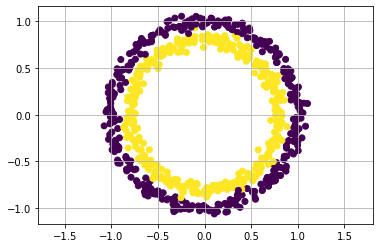

In [ ]:
plt.scatter(x1, x2, c=Y)
plt.grid('on')
plt.axis('equal')

2차원으로 만들어진 데이터의 모습이다. 

색깔 옵션 c(color)=Y라고 설정해줘야 두 줄짜리 데이터의 분류를 한 눈에 볼 수 있다.

input space는 예상했던 것처럼 노란색과 보라색 데이터가 붙어있어 

직선은 물론 원형으로도 구분하기 어려워보인다.

정확한 표를 보기 위해 grid를 사용하고, 찌그러진 원 모양을 피기 위하여 axis를 사용한다.

In [ ]:
x3 = (-x1**2) + (-x2**2)

2차원으로 보이는 데이터에게 높이 속성을 부여하기 위하여 x3을 생성한다.


homework_svm1.ipynb에서 x3의 값을 ( x1제곱 + x2제곱 )으로 주었다면 

이번에는 각각의 x 앞에 마이너스를 붙여준다.

이는 중심에서 멀어질수록 낮아지는 함수를 만들기 위함이다.



In [ ]:
x3[0]

-0.603948541007832

x3에 0이 제대로 들어있는지 확인해준다.



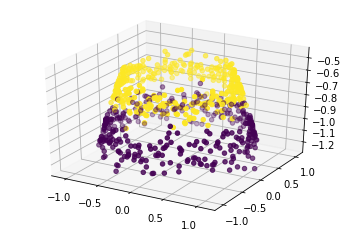

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=Y)

3차원 그림을 그려본다.

모래성 모양과 비슷하게 기본 포물선에서 뒤집어진 모양이 나온다.



## SVM 테스트 #1

In [ ]:
from sklearn.svm import SVC
model1 = SVC(kernel = 'linear')

위의 데이터가 선형으로 잘라지는 것이 맞는지 확인해본다.

원래의 데이터를 가지고 SVM 테스트를 한다.

In [ ]:
model1.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def PlotSVM2D(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
    import matplotlib as mpl
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    ZZ = np.reshape(model.predict(
        np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
    fig = plt.figure(figsize=(5,5))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")

모델이 제대로 학습했는지 확인해본다.

그림 그리는 함수는 첨부파일을 참고해 복사해왔다.

위의 코드는 2차원 SVM을 그려주는 데이터함수이다.

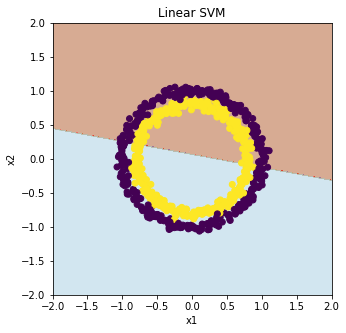

In [ ]:
PlotSVM2D(X, Y, model=model1, title='Linear SVM')

테스트 결과 제대로 나뉘지 않은 것을 확인할 수 있다.

## SVM 테스트 #2

In [ ]:
X.shape

(700, 2)

In [ ]:
X2 = np.vstack((x1, x2, x3)).T

뒷부분에 .T를 찍어주어 가로세로 횡렬을 바꿔준다.

In [ ]:
X2.shape

(700, 3)

X에서 한 축이 늘어났다.

In [ ]:
model2 = SVC(kernel = 'linear')

In [ ]:
model2.fit(X2, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def PlotSVM3D(X, Y, model):
  import numpy as np
  X1 = X[:, 0]
  X2 = X[:, 1]
  X3 = X[:, 2]
  w = model.coef_ 
  b = model.intercept_ 

  x1, x2 = np.meshgrid(X1, X2) 
  x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 

  fig = plt.figure() 
  axes2 = fig.add_subplot(111, projection = '3d') 
  axes2.scatter(X1, X2, X3, c = Y) 
  axes1 = fig.gca(projection = '3d') 
  axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
  #plt.show()

테스트1과 달리 3D로 테스트한다.

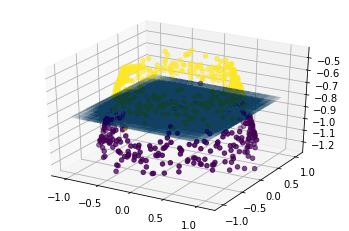

In [ ]:
PlotSVM3D(X2, Y, model=model2)

색깔이 다른 두 점이 나뉜 것이 보인다.

다른 프로그램을 이용하면 노란색 점과 보라색 점이 어느 위치에 있는지 정확하게 볼 수 있다.

## SVM 테스트 #3

In [ ]:
model3 = SVC(kernel = 'rbf')

kernel에 앞의 테스트에서 사용했던 linear 대신 rbf를 사용한다.

In [ ]:
model3.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

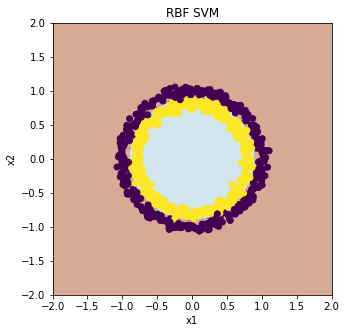

In [ ]:
PlotSVM2D(X, Y, model=model3, title='RBF SVM')

테스트1에서 사용했던 코드를 복사 후 붙여넣기 해준다.

rbf 커널을 사용하자 노란색 점과 보라색 점의 경계에 맞추어 나눠진다.

밖으로 갈수록 높이가 달라지는 성질을 이용하여 데이터를 쉽게 나눌 수 있다.